In [101]:
#! /usr/bin/python
# provide a checker to test whether the site is located in PAR region or not 
   
#      PAR#1	X	60,001	2,699,520
#      PAR#2	X	154,931,044	155,260,560
#      PAR#1	Y	10,001	2,649,520
#      PAR#2	Y	59,034,050	59,363,566

# @para: chromosome, position
# @return: boolean 
def is_PAR(chromosome, position):
    if (chromosome == 23) and (((position >= 60001) and (position <= 2699520)) or ((position >= 154931044) and (position > 155260560))):
        return(True)
    elif (chromosome == 24) and (((position >= 10001) and (position <= 2649520)) or ((position >= 59034050) and (position > 59363566))):
        return(True)
    else:
        return(False)

In [102]:
import pandas as pd
from IPython.core.display import display, HTML
# description for .hh file:
#    Produced automatically when the input data contains heterozygous calls where they 
#    shouldn't be possible (haploid chromosomes, male X/Y), or there are nonmissing calls for nonmales 
#    on the Y chromosome.
# import .hh file
h_cols = ['fid', 'iid', 'snp_id']
hh_3caller = pd.read_csv('~/projects/VCF GWAS concordance/data/GPC_COGS_CAU_Psych_merge.hh', 
                         sep='\t', 
                         names=h_cols)
hh_2caller = pd.read_csv('~/projects/VCF GWAS concordance/data/GPC_COGS_CAU_Psych_2caller.hh', 
                         sep='\t', 
                         names=h_cols)
hh_vcf = pd.read_csv('~/projects/VCF GWAS concordance/data/standardized.vcf.hh', 
                     sep='\t', 
                     names=h_cols)


In [103]:
# .fam (PLINK sample information file)
#    Sample information file accompanying a .bed binary genotype table. (--make-just-fam can be used to update just this file.) Also generated by '--recode lgen' and '--recode rlist'.
#    A text file with no header line, and one line per sample with the following six fields:
#    Family ID ('FID')
#    Within-family ID ('IID'; cannot be '0')
#    Within-family ID of father ('0' if father isn't in dataset)
#    Within-family ID of mother ('0' if mother isn't in dataset)
#    Sex code ('1' = male, '2' = female, '0' = unknown)
#    Phenotype value ('1' = control, '2' = case, '-9'/'0'/non-numeric = missing data if case/control)
f_cols = ['fid', 'iid', 'pid', 'mid', 'gender', 'phenotype']
fam_3caller = pd.read_csv('~/projects/VCF GWAS concordance/data/GPC_COGS_CAU_Psych_merge.fam', 
                          sep=' ', 
                          names=f_cols)
fam_2caller = pd.read_csv('~/projects/VCF GWAS concordance/data/GPC_COGS_CAU_Psych_2caller.fam', 
                          sep=' ', 
                          names=f_cols)
fam_vcf = pd.read_csv('~/projects/VCF GWAS concordance/data/standardized.vcf.fam',
                      sep=' ', 
                      names=f_cols)


In [104]:
## count the number of females in .fam file
fam_female_3caller = fam_3caller[fam_3caller['gender'] == 0]
fam_female_2caller = fam_2caller[fam_2caller['gender'] == 0]
fam_female_vcf = fam_vcf[fam_vcf['gender'] == 0]


In [105]:
## count the number of males in .fam file
fam_male_3caller = fam_3caller[fam_3caller['gender'] == 1]
fam_male_2caller = fam_2caller[fam_2caller['gender'] == 1]
fam_male_vcf = fam_vcf[fam_vcf['gender'] == 1]


In [106]:
#description for .bim (PLINK extended MAP file)
#   Extended variant information file accompanying a .bed binary genotype table. (--make-just-bim can be used to update just this file.)
#   A text file with no header line, and one line per variant with the following six fields:
#   Chromosome code (either an integer, or 'X'/'Y'/'XY'/'MT'; '0' indicates unknown) or name
#   Variant identifier
#   Position in morgans or centimorgans (safe to use dummy value of '0')
#   Base-pair coordinate (normally 1-based, but 0 ok; limited to 231-2)
#   Allele 1 (corresponding to clear bits in .bed; usually minor)
#   Allele 2 (corresponding to set bits in .bed; usually major)
b_cols = ['chromosome', 'identifier', 'position_in_morgans', 'position', 'allele1', 'allele2']
bim_3caller = pd.read_csv('~/projects/VCF GWAS concordance/data/GPC_COGS_CAU_Psych_merge.bim', 
                          sep='\t', 
                          names=b_cols)
bim_2caller = pd.read_csv('~/projects/VCF GWAS concordance/data/GPC_COGS_CAU_Psych_2caller.bim', 
                          sep='\t', 
                          names=b_cols)
bim_vcf = pd.read_csv('~/projects/VCF GWAS concordance/data/standardized.vcf.bim',
                      sep='\t', 
                      names=b_cols)


In [107]:
## merge the .hh file & .bim file & .fam file
#    when merging the .hh file & .bim, using the snp_identifier as the key
tmp_merged_3caller = hh_3caller.merge(bim_3caller, 
                                      left_on='snp_id', 
                                      right_on='identifier', 
                                      how='left')
tmp_merged_2caller = hh_2caller.merge(bim_2caller, 
                                      left_on='snp_id', 
                                      right_on='identifier', 
                                      how='left')
tmp_merged_vcf = hh_vcf.merge(bim_vcf, 
                              left_on='snp_id', 
                              right_on='identifier', 
                              how='left')

#    when merging the intermediate file with .fam file, using the ['fid', 'iid'] as the key
merged_3caller = tmp_merged_3caller.merge(fam_3caller, 
                                          left_on = ['fid', 'iid'], 
                                          right_on = ['fid', 'iid'], 
                                          how='left')
merged_2caller = tmp_merged_2caller.merge(fam_2caller, 
                                          left_on = ['fid', 'iid'], 
                                          right_on = ['fid', 'iid'], 
                                          how='left')
merged_vcf = tmp_merged_vcf.merge(fam_vcf, 
                                  left_on = ['fid', 'iid'], 
                                  right_on = ['fid', 'iid'], 
                                  how='left') 


In [108]:
## filter females
merged_3caller_female = merged_3caller[merged_3caller['gender'] == 0]
merged_2caller_female = merged_2caller[merged_2caller['gender'] == 0]
merged_vcf_female = merged_vcf[merged_vcf['gender'] == 0]

In [109]:
## filter males
merged_3caller_male = merged_3caller[merged_3caller['gender'] == 1]
merged_2caller_male = merged_2caller[merged_2caller['gender'] == 1]
merged_vcf_male = merged_vcf[merged_vcf['gender'] == 1]

In [110]:
## identify variants on Y chromosome
merged_3caller_on_Y = merged_3caller[merged_3caller['chromosome'] == 24]
merged_2caller_on_Y = merged_2caller[merged_2caller['chromosome'] == 24]
merged_vcf_on_Y = merged_vcf[merged_vcf['chromosome'] == 24]

In [111]:
## identify variants on Y chromosome
merged_3caller_on_Y_PAR = merged_3caller_on_Y[merged_3caller_on_Y[['chromosome',
                                                         'position']].apply(lambda x: is_PAR(*x), axis = 1)]
merged_2caller_on_Y_PAR = merged_2caller_on_Y[merged_2caller_on_Y[['chromosome',
                                                         'position']].apply(lambda x: is_PAR(*x), axis = 1)]
merged_vcf_on_Y_PAR = merged_vcf_on_Y[merged_vcf_on_Y[['chromosome',
                                                         'position']].apply(lambda x: is_PAR(*x), axis = 1)]

In [112]:
## identify variants that are on X chromosome
merged_3caller_on_X = merged_3caller[merged_3caller['chromosome'] == 23]
merged_2caller_on_X = merged_2caller[merged_2caller['chromosome'] == 23]
merged_vcf_on_X = merged_vcf[merged_vcf['chromosome'] == 23]

In [113]:
## identify variant on X PAR region
merged_3caller_on_X_PAR = merged_3caller_on_X[merged_3caller_on_X[['chromosome', 'position']].apply(lambda x: is_PAR(*x), axis = 1)]
merged_2caller_on_X_PAR = merged_2caller_on_X[merged_2caller_on_X[['chromosome', 'position']].apply(lambda x: is_PAR(*x), axis = 1)]
merged_vcf_on_X_PAR = merged_vcf_on_X[merged_vcf_on_X[['chromosome', 'position']].apply(lambda x: is_PAR(*x), axis = 1)]

In [114]:
## grouped by snp
##     groupby + size created a Series Object, we can use the `to_frame` method to convert Series to pandas.dataframe
groupbysnp_3caller = merged_3caller.groupby('snp_id').size().reset_index(name='count_3caller')
groupbysnp_2caller = merged_2caller.groupby('snp_id').size().reset_index(name='count_2caller')
groupbysnp_vcf = merged_vcf.groupby('snp_id').size().reset_index(name='count_vcf')

In [115]:
## merge groupbysnp from different callers
groupbysnp_tmp = groupbysnp_3caller.merge(groupbysnp_2caller, left_on='snp_id', right_on = 'snp_id', how='inner')
groupbysnp_all = groupbysnp_tmp.merge(groupbysnp_vcf, left_on = 'snp_id', right_on = 'snp_id', how = 'inner')

In [116]:
groupbysnp_all = groupbysnp_all.merge(bim_2caller, left_on = 'snp_id', right_on = 'identifier', how = 'inner')

In [117]:
groupbysnp_all['diff_3caller_2caller'] = groupbysnp_all['count_3caller'] - groupbysnp_all['count_2caller']
groupbysnp_all['diff_3caller_vcf'] = groupbysnp_all['count_3caller'] - groupbysnp_all['count_vcf']
groupbysnp_all['diff_2caller_vcf'] = groupbysnp_all['count_2caller'] - groupbysnp_all['count_vcf']

In [118]:
groupbysnp_allX = groupbysnp_all[groupbysnp_all['chromosome'] == 23]
groupbysnp_allY = groupbysnp_all[groupbysnp_all['chromosome'] == 24]

In [119]:
groupbysnp_allX = groupbysnp_allX.sort_values(by='position', ascending=True)

In [120]:
groupbysnp_allY = groupbysnp_allY.sort_values(by='position', ascending=True)

In [121]:
import math
min_position = groupbysnp_allX['position'].min()
max_position = groupbysnp_allX['position'].max()
groupbysnp_allX['position_in_mb'] = groupbysnp_allX['position'].apply(lambda x: float("{0:.2f}".format(x / 1000000.0)))

# Heterozygous Calls Check

### Per-variant het counts in the X chromosome
- show het counts difference in ChrX in subplots

In [122]:
#      PAR#1	X	60,001	2,699,520
#      PAR#2	X	154,931,044	155,260,560
#      PAR#1	Y	10,001	2,649,520
#      PAR#2	Y	59,034,050	59,363,566
#      the length of Y chromosome: 57,227,415
#      the length of X chromosome: 156,040,895

x_PAR1_start = 60001 / 1000000.0
x_PAR1_end = 2699520 / 1000000.0
x_PAR2_start = 154931044 / 1000000.0
x_PAR2_end = 155260560 / 1000000.0
y_PAR1_start = 10001 / 1000000.0
y_PAR1_end = 2649520 / 1000000.0
y_PAR2_start = 59034050 / 1000000.0
y_PAR2_end = 59363566 / 1000000.0

x_len = 155270560/ 1000000.0
y_len = 59373566 / 1000000.0

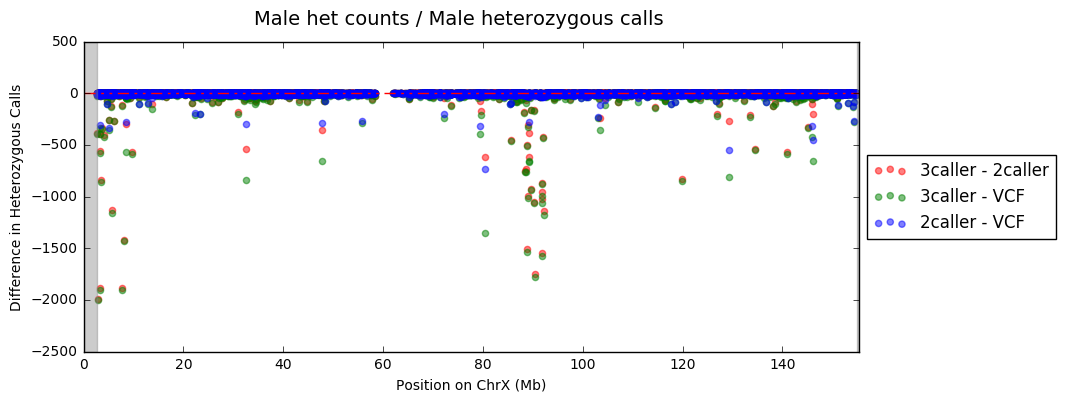

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

#      Could you shade in the hg19 PAR regions for X and Y?

plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')

plt.axvspan(x_PAR1_start, 
            x_PAR1_end, 
            alpha=0.4, 
            color='grey')

plt.axvspan(x_PAR2_start, 
            x_PAR2_end, 
            alpha=0.4, 
            color='grey')

plt.scatter(groupbysnp_allX['position_in_mb'], 
            groupbysnp_allX['diff_3caller_2caller'], 
            color='red', 
            alpha=0.5, 
            label='3caller - 2caller')

plt.scatter(groupbysnp_allX['position_in_mb'], 
            groupbysnp_allX['diff_3caller_vcf'], 
            color='green', 
            alpha=0.5, 
            label='3caller - VCF')

plt.scatter(groupbysnp_allX['position_in_mb'], 
            groupbysnp_allX['diff_2caller_vcf'], 
            color = 'blue', 
            alpha=0.5,
            label='2caller - VCF')





plt.axhline(0, color='red', 
            dashes=[8, 4, 2, 4, 2, 4])

plt.xlim(0, x_len)
plt.xlabel("Position on ChrX (Mb)")
plt.ylabel("Difference in Heterozygous Calls")
plt.suptitle("Male het counts / Male heterozygous calls", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('/Users/danfengc/projects/VCF GWAS concordance/concordance_check/plots/het_x_per_snp_sameplot.pdf', figsize=(12, 4), dpi=80, bbox_inches='tight')

- show het counts difference in ChrX in subplots

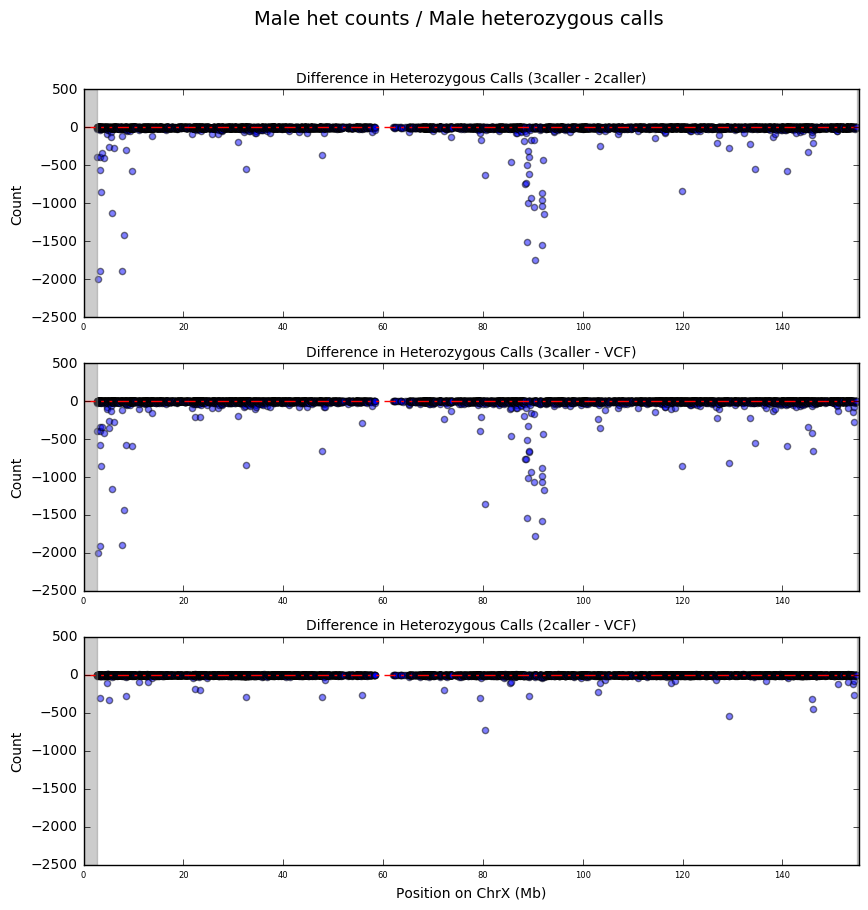

In [124]:
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

ax1 = plt.subplot(311)

plt.axvspan(x_PAR1_start, 
            x_PAR1_end, 
            alpha=0.4, 
            color='grey')

plt.axvspan(x_PAR2_start, 
            x_PAR2_end, 
            alpha=0.4, 
            color='grey')

plt.scatter(groupbysnp_allX['position_in_mb'],
            groupbysnp_allX['diff_3caller_2caller'], 
            label='3caller - 2caller', 
            alpha=0.5)
plt.axhline(0, color='red', dashes=[8, 4, 2, 4, 2, 4])

plt.setp(ax1.get_xticklabels(), fontsize=6)
plt.ylabel("Count")


ax2 = plt.subplot(312, sharex=ax1, sharey=ax1)

plt.axvspan(x_PAR1_start, 
            x_PAR1_end, 
            alpha=0.4, 
            color='grey')

plt.axvspan(x_PAR2_start, 
            x_PAR2_end, 
            alpha=0.4, 
            color='grey')

plt.scatter(groupbysnp_allX['position_in_mb'], 
            groupbysnp_allX['diff_3caller_vcf'], 
            label='3caller - vcf',
            alpha=0.5)
plt.axhline(0, color='red', dashes=[8, 4, 2, 4, 2, 4])

plt.setp(ax2.get_xticklabels(), fontsize=6)
plt.ylabel("Count")


ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)

plt.axvspan(x_PAR1_start, 
            x_PAR1_end, 
            alpha=0.4, 
            color='grey')

plt.axvspan(x_PAR2_start, 
            x_PAR2_end, 
            alpha=0.4, 
            color='grey')

plt.scatter(groupbysnp_allX['position_in_mb'], 
            groupbysnp_allX['diff_2caller_vcf'], 
            label='2caller - vcf', 
            alpha=0.5)
plt.setp(ax3.get_xticklabels(), fontsize=6)

plt.axhline(0, color='red', dashes=[8, 4, 2, 4, 2, 4])
plt.ylabel("Count")


plt.xlim(0, x_len)
plt.xlabel("Position on ChrX (Mb)")



ax1.title.set_text('Difference in Heterozygous Calls (3caller - 2caller)')
ax2.title.set_text('Difference in Heterozygous Calls (3caller - VCF)')
ax3.title.set_text('Difference in Heterozygous Calls (2caller - VCF)')


ax1.title.set_fontsize(10)
ax2.title.set_fontsize(10)
ax3.title.set_fontsize(10)
plt.suptitle("Male het counts / Male heterozygous calls", fontsize=14)
plt.savefig('/Users/danfengc/projects/VCF GWAS concordance/concordance_check/plots/het_x_per_snp_diffplot.pdf', figsize=(10, 10), dpi=80, bbox_inches='tight')

In [125]:
## adding position in Megabase column
groupbysnp_allY['position_in_mb'] = groupbysnp_allY['position'].apply(lambda x: float("{0:.2f}".format(x / 1000000.0)))

In [126]:
max_position = groupbysnp_allY['position_in_mb'].max()

### Per-variant het counts in the Y chromosome
- show het counts difference in ChrY in same plot

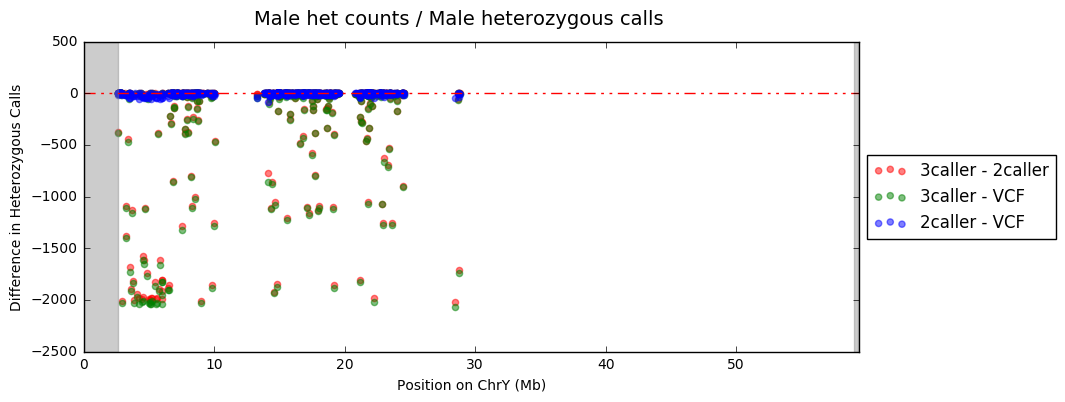

In [127]:
plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')

plt.axvspan(y_PAR1_start, 
            y_PAR1_end, 
            alpha=0.4, 
            color='grey')

plt.axvspan(y_PAR2_start, 
            y_PAR2_end, 
            alpha=0.4, 
            color='grey')

plt.scatter(groupbysnp_allY['position_in_mb'], 
            groupbysnp_allY['diff_3caller_2caller'], 
            color='red', 
            alpha=0.5, 
            label='3caller - 2caller')

plt.scatter(groupbysnp_allY['position_in_mb'], 
            groupbysnp_allY['diff_3caller_vcf'], 
            color='green', 
            alpha=0.5, 
            label='3caller - VCF')

plt.scatter(groupbysnp_allY['position_in_mb'], 
            groupbysnp_allY['diff_2caller_vcf'], 
            color = 'blue', 
            alpha=0.5,
            label='2caller - VCF')

plt.axhline(0, 
            color='red', 
            dashes=[8, 4, 2, 4, 2, 4])

plt.xlim(0, y_len)

plt.xlabel("Position on ChrY (Mb)")

plt.ylabel("Difference in Heterozygous Calls")

plt.suptitle("Male het counts / Male heterozygous calls", fontsize=14)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('/Users/danfengc/projects/VCF GWAS concordance/concordance_check/plots/het_y_per_snp_sameplot.pdf', figsize=(12, 4), dpi=80, bbox_inches='tight')

- show het counts difference in ChrY in subplots

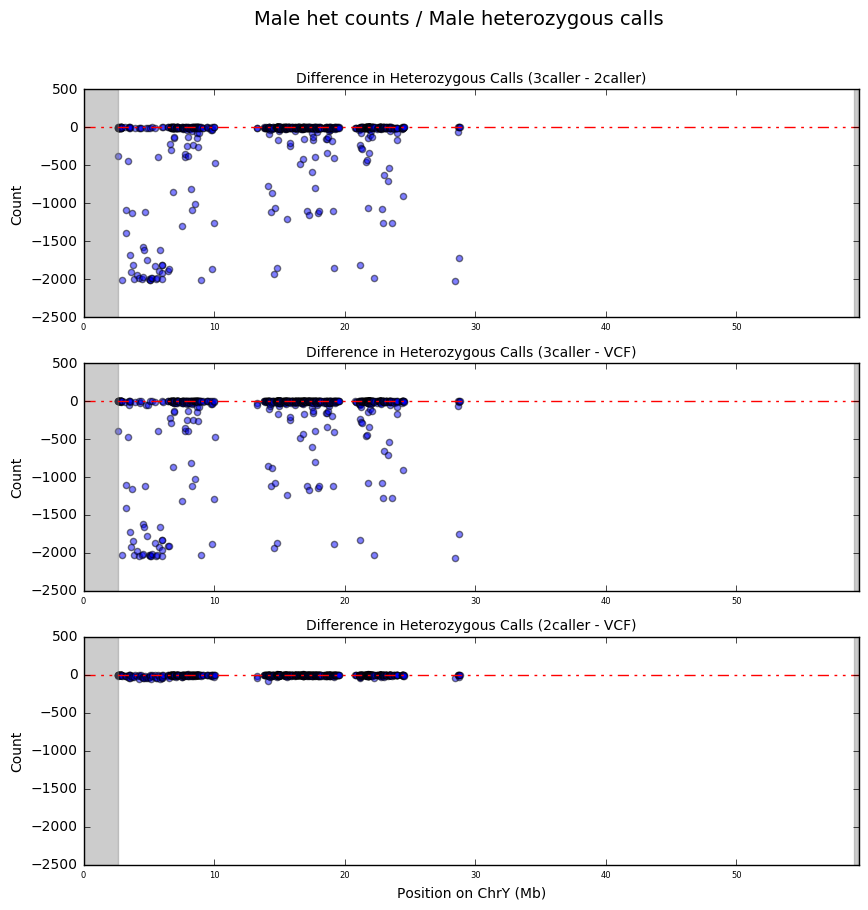

In [128]:
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

ax1 = plt.subplot(311)

plt.axvspan(y_PAR1_start, 
            y_PAR1_end, 
            alpha=0.4, 
            color='grey')

plt.axvspan(y_PAR2_start, 
            y_PAR2_end, 
            alpha=0.4, 
            color='grey')

plt.scatter(groupbysnp_allY['position_in_mb'],
            groupbysnp_allY['diff_3caller_2caller'], 
            label='3caller - 2caller', 
            alpha=0.5)
plt.axhline(0, color='red', dashes=[8, 4, 2, 4, 2, 4])

plt.setp(ax1.get_xticklabels(), fontsize=6)
plt.ylabel("Count")


ax2 = plt.subplot(312, sharex=ax1, sharey=ax1)

plt.axvspan(y_PAR1_start, 
            y_PAR1_end, 
            alpha=0.4, 
            color='grey')

plt.axvspan(y_PAR2_start, 
            y_PAR2_end, 
            alpha=0.4, 
            color='grey')

plt.scatter(groupbysnp_allY['position_in_mb'], 
            groupbysnp_allY['diff_3caller_vcf'], 
            label='3caller - vcf',
            alpha=0.5)
plt.axhline(0, color='red', dashes=[8, 4, 2, 4, 2, 4])

plt.setp(ax2.get_xticklabels(), fontsize=6)
plt.ylabel("Count")


ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)

plt.axvspan(y_PAR1_start, 
            y_PAR1_end, 
            alpha=0.4, 
            color='grey')

plt.axvspan(y_PAR2_start, 
            y_PAR2_end, 
            alpha=0.4, 
            color='grey')

plt.scatter(groupbysnp_allY['position_in_mb'], 
            groupbysnp_allY['diff_2caller_vcf'], 
            label='2caller - vcf', 
            alpha=0.5)
plt.setp(ax3.get_xticklabels(), fontsize=6)

plt.axhline(0, color='red', dashes=[8, 4, 2, 4, 2, 4])
plt.ylabel("Count")


plt.xlim(0, y_len)
plt.xlabel("Position on ChrY (Mb)")



ax1.title.set_text('Difference in Heterozygous Calls (3caller - 2caller)')
ax2.title.set_text('Difference in Heterozygous Calls (3caller - VCF)')
ax3.title.set_text('Difference in Heterozygous Calls (2caller - VCF)')


ax1.title.set_fontsize(10)
ax2.title.set_fontsize(10)
ax3.title.set_fontsize(10)
plt.suptitle("Male het counts / Male heterozygous calls", fontsize=14)
plt.savefig('/Users/danfengc/projects/VCF GWAS concordance/concordance_check/plots/het_y_per_snp_diffplot.pdf', figsize=(10, 10), dpi=80, bbox_inches='tight')

In [129]:
# compute the Heterozygous Rate 

# number of males:
#      2033 ---> 3caller
#      2037 ---> 2caller
#      2019 ---> VCF

groupbysnp_3caller["hr_3caller"] = groupbysnp_3caller['count_3caller'] / fam_3caller[fam_3caller['gender'] == 1].shape[0]
groupbysnp_2caller["hr_2caller"] = groupbysnp_2caller['count_2caller'] / fam_2caller[fam_2caller['gender'] == 1].shape[0]
groupbysnp_vcf["hr_vcf"] = groupbysnp_vcf['count_vcf'] / fam_vcf[fam_vcf['gender'] == 1].shape[0]

In [130]:
sorted_3caller = groupbysnp_3caller.sort_values(by='hr_3caller', ascending=False)
sorted_2caller = groupbysnp_2caller.sort_values(by='hr_2caller', ascending=False)
sorted_vcf = groupbysnp_vcf.sort_values(by='hr_vcf', ascending=False)
sorted_3caller = sorted_3caller.merge(bim_3caller, 
                             left_on = 'snp_id', 
                             right_on = 'identifier', 
                             how = 'left')
sorted_2caller = sorted_2caller.merge(bim_2caller, 
                             left_on = 'snp_id', 
                             right_on = 'identifier', 
                             how = 'left')
sorted_vcf = sorted_vcf.merge(bim_vcf, 
                             left_on = 'snp_id', 
                             right_on = 'identifier', 
                             how = 'left')

### Variants in ranked by heterozygous rate (only showing the top 10)
- 3 caller

In [131]:
sorted_3caller[['snp_id', 'chromosome', 'position', 'hr_3caller']].head(n=20)

,snp_id,chromosome,position,hr_3caller
0,rs3100565,24,4749584,0.997541
1,rs2571981,24,4951225,0.997541
2,2010-08-Y-273,24,10029880,0.997541
3,rs2444535,24,3497097,0.997049
4,GA026712,24,21152731,0.996557
5,2010-08-Y-255,24,10029308,0.996065
6,GA026703,24,13324571,0.996065
7,GA008529,24,21154004,0.996065
8,2010-08-Y-54,24,9992071,0.994097
9,GA008498,24,13309602,0.992622


- 2 caller

In [132]:
sorted_2caller[['snp_id', 'chromosome', 'position', 'hr_2caller']].head(n=20)

,snp_id,chromosome,position,hr_2caller
0,2010-08-Y-273,24,10029880,0.997545
1,rs2571981,24,4951225,0.997545
2,2010-08-Y-86,24,10019352,0.997545
3,rs3100565,24,4749584,0.997545
4,rs2444535,24,3497097,0.997054
5,GA008524,24,21152701,0.997054
6,GA026712,24,21152731,0.996564
7,GA008532,24,28463253,0.996564
8,GA026703,24,13324571,0.996073
9,2010-08-Y-255,24,10029308,0.996073


- VCF

In [133]:
sorted_vcf[['snp_id', 'chromosome', 'position', 'hr_vcf']].head(n=20)

,snp_id,chromosome,position,hr_vcf
0,rs2571981,24,4951225,0.997602
1,rs2444535,24,3497097,0.997122
2,rs3100565,24,4749584,0.997122
3,GA008532,24,28463253,0.996643
4,GA026712,24,21152731,0.996163
5,GA026703,24,13324571,0.995204
6,rs2559269,24,3576834,0.994724
7,GA008529,24,21154004,0.990408
8,rs2500852,24,5849423,0.988010
9,GA008524,24,21152701,0.987050


### Per-individual het counts 
- distribution of heterozyous calls in different callers

In [134]:
## grouped by individual on X
groupbyind_3caller_on_X = merged_3caller_on_X.groupby(['fid', 'iid']).size().reset_index(name='count_3caller')
groupbyind_2caller_on_X = merged_2caller_on_X.groupby(['fid', 'iid']).size().reset_index(name='count_2caller')
groupbyind_vcf_on_X = merged_vcf_on_X.groupby(['fid', 'iid']).size().reset_index(name='count_vcf')

In [135]:
## merge groupbysnp from different callers on X
groupbyind_tmp = groupbyind_3caller_on_X.merge(groupbyind_2caller_on_X, 
                                          left_on=['fid', 'iid'], 
                                          right_on=['fid', 'iid'], 
                                          how='inner')
groupbyind_all_on_X = groupbyind_tmp.merge(groupbyind_vcf_on_X, 
                                      left_on='iid', 
                                      right_on='iid', 
                                      how='inner')

In [136]:
## grouped by individual on Y
groupbyind_3caller_on_Y = merged_3caller_on_Y.groupby(['fid', 'iid']).size().reset_index(name='count_3caller')
groupbyind_2caller_on_Y = merged_2caller_on_Y.groupby(['fid', 'iid']).size().reset_index(name='count_2caller')
groupbyind_vcf_on_Y = merged_vcf_on_Y.groupby(['fid', 'iid']).size().reset_index(name='count_vcf')

In [137]:
## merge groupbysnp from different callers on Y
groupbyind_tmp = groupbyind_3caller_on_Y.merge(groupbyind_2caller_on_Y, 
                                          left_on=['fid', 'iid'], 
                                          right_on=['fid', 'iid'], 
                                          how='inner')
groupbyind_all_on_Y = groupbyind_tmp.merge(groupbyind_vcf_on_Y, 
                                      left_on='iid', 
                                      right_on='iid', 
                                      how='inner')

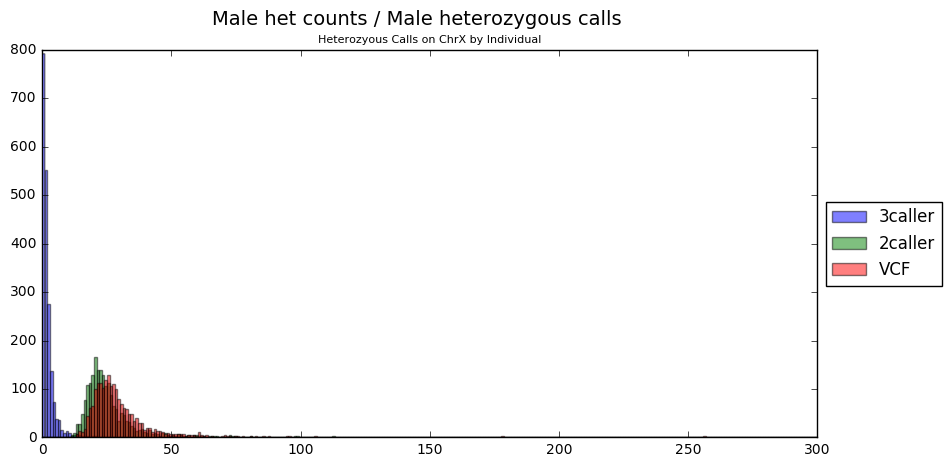

In [138]:
import numpy
bins = numpy.linspace(0, 300, 300)
plt.figure(num=None, 
           figsize=(10, 5), 
           dpi=80, 
           facecolor='w', 
           edgecolor='k')

plt.hist(groupbyind_3caller_on_X['count_3caller'], 
         bins, 
         alpha=0.5, 
         label = '3caller')

plt.hist(groupbyind_2caller_on_X['count_2caller'], 
         bins, 
         alpha=0.5, 
         label = '2caller')

plt.hist(groupbyind_vcf_on_X['count_vcf'], 
         bins, 
         alpha=0.5, 
         label = 'VCF')


plt.title('Heterozyous Calls on ChrX by Individual', 
          fontsize=8)

plt.suptitle("Male het counts / Male heterozygous calls", 
             fontsize=14)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5))

plt.savefig('/Users/danfengc/projects/VCF GWAS concordance/concordance_check/plots/dist_het_by_ind_on_X.pdf', 
            figsize=(10, 5), 
            dpi=80, 
            bbox_inches='tight')

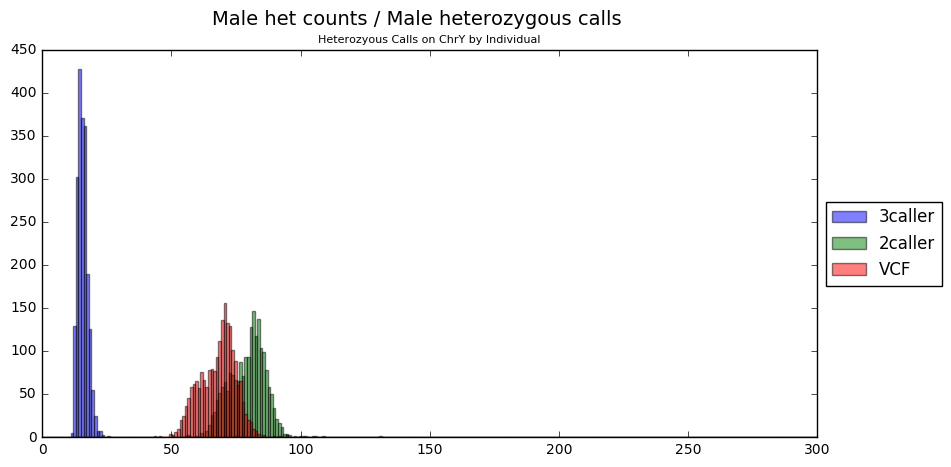

In [139]:
import numpy
bins = numpy.linspace(0, 300, 300)
plt.figure(num=None, 
           figsize=(10, 5), 
           dpi=80, 
           facecolor='w', 
           edgecolor='k')

plt.hist(groupbyind_3caller_on_Y['count_3caller'], 
         bins, 
         alpha=0.5, 
         label = '3caller')

plt.hist(groupbyind_2caller_on_Y['count_2caller'], 
         bins, 
         alpha=0.5, 
         label = '2caller')

plt.hist(groupbyind_vcf_on_Y['count_vcf'], 
         bins, 
         alpha=0.5, 
         label = 'VCF')


plt.title('Heterozyous Calls on ChrY by Individual', 
          fontsize=8)

plt.suptitle("Male het counts / Male heterozygous calls", 
             fontsize=14)

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5))

plt.savefig('/Users/danfengc/projects/VCF GWAS concordance/concordance_check/plots/dist_het_by_ind_on_Y.pdf', 
            figsize=(10, 5), 
            dpi=80, 
            bbox_inches='tight')